In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score,precision_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def fig_3d(X,y):
    fig = plt.figure()
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=28 )
    ax.scatter(X[:, 0], X[:, 1], y, c=y)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

In [3]:
dataset=np.loadtxt('transfusion.txt', delimiter=',', dtype=str, )
titles=np.loadtxt('transfusion_titles.txt', delimiter=',',dtype=str)
dataset=[[float(n) for n in e] for e in dataset]
X=[]
y=[]
for row in dataset:
    X.append(row[:4])
    y.append(int(row[4]))
X=np.array(X)
y=np.array(y)

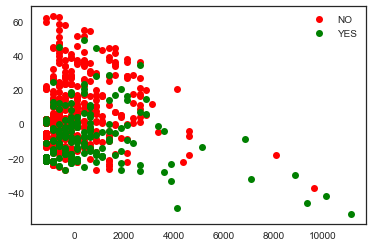

1 component: 99.98% of initial variance
-0.001 x Recency (months) + 0.004 x Frequency (times) + 1.000 x Monetary (c.c. blood) + 0.011 x Time (months)
2 component: 0.02% of initial variance
0.178 x Recency (months) + -0.000 x Frequency (times) + -0.010 x Monetary (c.c. blood) + 0.984 x Time (months)


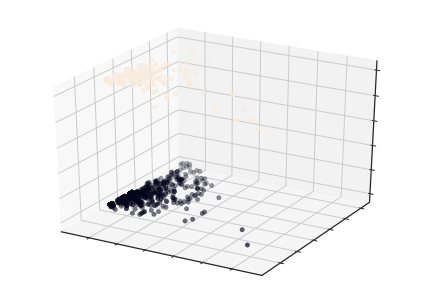

In [4]:
pca=decomposition.PCA(n_components=2)
X_centred = X-X.mean(axis=0)
pca.fit(X_centred)
X_pca=pca.transform(X_centred)
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'ro', label='NO')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='YES')
plt.legend(loc=0)
plt.show()
fig_3d(X_pca,y)
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            titles)))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3,stratify=y,random_state=41)

In [11]:
clf_LR1= LogisticRegression(penalty='l1', tol=0.01, solver='saga')
clf_LR1.fit(X_train,y_train)
preds_LR1=clf_LR1.predict_proba(X_test)
y_score_LR1=clf_LR1.predict(X_test)
print (preds_LR1)

[[ 0.52546169  0.47453831]
 [ 0.49696756  0.50303244]
 [ 0.58395966  0.41604034]
 [ 0.539745    0.460255  ]
 [ 0.58217183  0.41782817]
 [ 0.41066521  0.58933479]
 [ 0.54697115  0.45302885]
 [ 0.47688504  0.52311496]
 [ 0.50946137  0.49053863]
 [ 0.43800714  0.56199286]
 [ 0.37268698  0.62731302]
 [ 0.42214819  0.57785181]
 [ 0.50134936  0.49865064]
 [ 0.53318498  0.46681502]
 [ 0.57520682  0.42479318]
 [ 0.53996515  0.46003485]
 [ 0.55796904  0.44203096]
 [ 0.48883739  0.51116261]
 [ 0.57325666  0.42674334]
 [ 0.48899995  0.51100005]
 [ 0.56279794  0.43720206]
 [ 0.27861558  0.72138442]
 [ 0.59360861  0.40639139]
 [ 0.52226801  0.47773199]
 [ 0.54925039  0.45074961]
 [ 0.55902686  0.44097314]
 [ 0.59360861  0.40639139]
 [ 0.56279794  0.43720206]
 [ 0.52362754  0.47637246]
 [ 0.48532061  0.51467939]
 [ 0.40680763  0.59319237]
 [ 0.46039075  0.53960925]
 [ 0.55296133  0.44703867]
 [ 0.48293528  0.51706472]
 [ 0.50050553  0.49949447]
 [ 0.49511735  0.50488265]
 [ 0.59168296  0.40831704]
 

In [7]:
clf_SVM=SVC(kernel='rbf', tol=0.01, probability=True)
clf_SVM.fit(X_train,y_train)
preds_SVM=clf_SVM.predict_proba(X_test)
y_score_SVM=clf_SVM.predict(X_test)

In [8]:
clf_KNN=KNeighborsClassifier(n_neighbors=5, weights='uniform' )
clf_KNN.fit(X_train,y_train)
preds_KNN=clf_KNN.predict_proba(X_test)
y_score_KNN=clf_KNN.predict(X_test)

In [9]:
clf_DTC = DecisionTreeClassifier(max_depth=2, random_state=42)
clf_DTC.fit(X_train, y_train)
preds_DTC = clf_DTC.predict_proba(X_test)
y_score_DTC=clf_DTC.predict(X_test)

In [10]:
print('Accuracy_LR1: {:.5f}'.format(accuracy_score(y_test, preds_LR1.argmax(axis=1))))
print('Precision_LR1: {:.5f}'.format(precision_score(y_test, preds_LR1.argmax(axis=1))))
print('Roc_Auc_LR1: {:.5f} \n'.format(roc_auc_score(y_test, preds_LR1.argmax(axis=1))))

print('Accuracy_KNN: {:.5f}'.format(accuracy_score(y_test, preds_SVM.argmax(axis=1))))
print('Precision_KNN: {:.5f}'.format(precision_score(y_test, preds_SVM.argmax(axis=1))))
print('Roc_Auc_KNN: {:.5f}\n'.format(roc_auc_score(y_test, preds_SVM.argmax(axis=1))))

print('Accuracy_KNN: {:.5f}'.format(accuracy_score(y_test, preds_KNN.argmax(axis=1))))
print('Precision_KNN: {:.5f}'.format(precision_score(y_test, preds_KNN.argmax(axis=1))))
print('Roc_Auc_KNN: {:.5f}\n'.format(roc_auc_score(y_test, preds_KNN.argmax(axis=1))))

print('Accuracy_DTC: {:.5f}'.format(accuracy_score(y_test, preds_DTC.argmax(axis=1))))
print('Precision_DTC: {:.5f}'.format(precision_score(y_test, preds_DTC.argmax(axis=1))))
print('Roc_Auc_DTC: {:.5f}'.format(roc_auc_score(y_test, preds_DTC.argmax(axis=1))))

Accuracy_LR1: 0.63556
Precision_LR1: 0.32500
Roc_Auc_LR1: 0.58285 

Accuracy_KNN: 0.75111
Precision_KNN: 0.00000
Roc_Auc_KNN: 0.49415

Accuracy_KNN: 0.71556
Precision_KNN: 0.33333
Roc_Auc_KNN: 0.53411

Accuracy_DTC: 0.74667
Precision_DTC: 0.45161
Roc_Auc_DTC: 0.57992
